In [2]:
import qiskit
qiskit.__qiskit_version__
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit import Aer
from qiskit import execute

#print(Aer.backends()) # ou de man
backend_list  = Aer.backends()
for be in backend_list:
    print(be)
backend = Aer.get_backend('qasm_simulator')

AerSimulator('aer_simulator')
AerSimulator('aer_simulator')
AerSimulator('aer_simulator')
AerSimulator('aer_simulator')
AerSimulator('aer_simulator')
AerSimulator('aer_simulator')
AerSimulator('aer_simulator')
AerSimulator('aer_simulator')
QasmSimulator('qasm_simulator')
StatevectorSimulator('statevector_simulator')
UnitarySimulator('unitary_simulator')


# Exercice 1

### Question 1

Pour réaliser la porte demandé,il suffit de placer une porte Cnot sur le premier bit en prenant comme convention que le premier bit est un bit de poids faible

c:\Users\aurel\.conda\envs\deeplearning\lib\site-packages\qiskit\visualization\circuit\matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


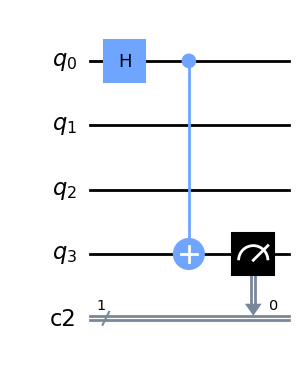

In [5]:
q1 = QuantumRegister(4,'q')
c1 = ClassicalRegister(1)
qc1 = QuantumCircuit(q1,c1)
#Dans l'exercice il est précisé que lon a H au au qubit de flag
qc1.h(q1[0])
#Réponse
qc1.cx(q1[0],q1[3])
#mesure du qubit de flag
qc1.measure(q1[3],c1[0])
#draw du circuit
qc1.draw(output ='mpl')


### Question 2

Le circuit est

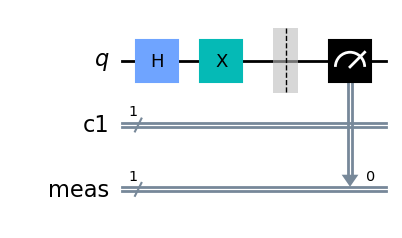

In [4]:
q = QuantumRegister(1,'q')
c = ClassicalRegister(1)
qc = QuantumCircuit(q,c)

#question 2
qc.h(q[0])
qc.x(q[0])
#mesure
qc.measure_all()
#draw du circuit
qc.draw(output ='mpl')


### Question 3

Le circuit est

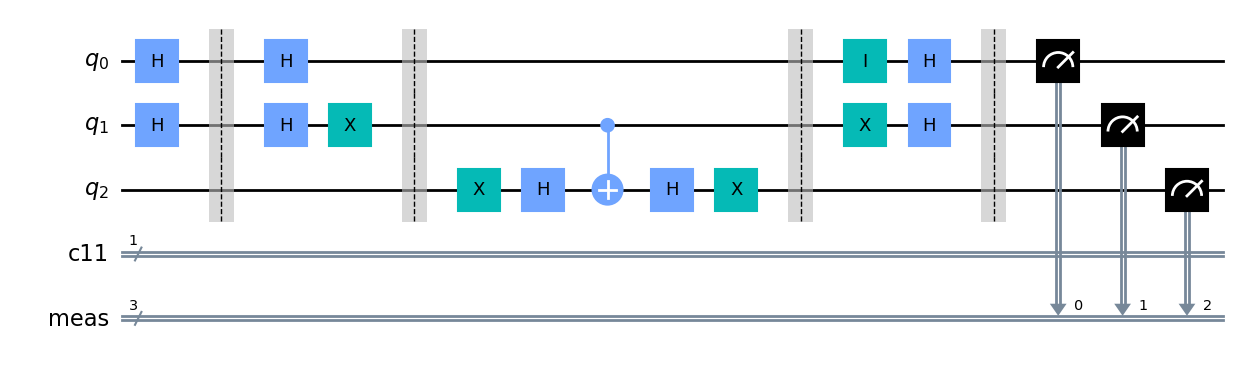

In [14]:
q2 = QuantumRegister(3,'q')
c2 = ClassicalRegister(1)
qc2 = QuantumCircuit(q2,c2)
#situation1(default)
#rien car les q bits sont tous à 0
#situation2
#qc2.x(q2[1])
#situation3
#qc2.x(q2[0])
#situation4
#qc2.x(q2[0])
#qc2.x(q2[1])
#situation initial de l'exercice
qc2.h(q2[0])
qc2.h(q2[1])
qc2.barrier()
#on transforme la situation initial en pour remettre les qubit dans l'état initial
qc2.h(q2[0])
#le seul qubit qui nous intéresse est le deuxième
qc2.h(q2[1])
qc2.x(q2[1])
qc2.barrier()   
#on applique la porte xet h sur le qubit de flag
qc2.x(q2[2])
qc2.h(q2[2])
#comme vu dans la question 2 on utilise la porte cnot
qc2.cx(q2[1],q2[2])
#on remet le circuit dans l'état initial
qc2.h(q2[2])
qc2.x(q2[2])
qc2.barrier()
qc2.x(q2[1])
qc2.id(q2[0]) #ligne qui sert exclusivement à aligner des trucs
qc2.h(q2[1])
qc2.h(q2[0])
#mesure
qc2.measure_all()
#draw du circuit
qc2.draw(output ='mpl')

# Exercice 2

### Question1

Pour trouver la probailité que l'oracle mesure x si f met tout à 0.
L'objectif de l'oracle est de laisser inchangé sauf si f(x)=1 ainsi il laisse inchangé l'entrée
$$
\phi =\frac{1}{\sqrt{2^{n}}} \sum_{x=0}^{2^{n-1}}(-1)^{f(x)} \ket{x}
$$  
Or f(x)=0 donc la probabilité de mesurer $\ket{x}$ en faisant le produit scalaire de l'expression précédente est
$$
(\frac{1}{\sqrt{2^{n}}})^{2}  
=\frac{1}{2^{n}}
$$  

### Question 2

Dans le cas ou ceci vaut 1 la formule pour le calcul sera
$$
(-1)^{q} H^{\otimes n} \ket{0}
$$
Or comme on mesure le seul terme $(-1)^{q}$ qui est suceptible de varier finalement est annulé par la mesure  
Ainsi la probabilité est 
$$
(\frac{1}{\sqrt{2^{n}}})^{2}  
=\frac{1}{2^{n}}
$$  

### Question 3

On a 1 si le dernier qubit de $\ket{x}$ vaut 0.On a 
$$
\phi_{1} = \frac{1}{\sqrt{2^{n}}} \sum_{x=0}^{2^{n-1}} \ket{x} 
$$  
$$
=\frac{1}{\sqrt{2^{n}}} (\sum_{x=0}^{2^{n-1}-1} \ket{x} + \sum_{x=2^{n-1}}^{2^{n}-1}\ket{x} )
$$  
a)Nous allons commencer à répondre à la question.On rappelle l'identité remarquable $\braket{x|y} = ||x||\space||y|| cos(\widehat{xy})$ 
Dans notre cas,on a  
$$
\braket{x|y}=\braket{H^{\otimes n} \ket{0} | \frac{1}{\sqrt{2^{n}}} \sum_{x=0}^{2^{n-1}}\ket{x}}
$$
$$
=\frac{1}{\sqrt{2^{n}}\sqrt{2^{n-1}}} \sum_{x=0}^{2^{n}-1}\sum_{y=0}^{2^{n-1}-1} \braket{\ket{x}|\ket{y}}
$$  
Or on a $\braket{\ket{x}| \ket{y}}$ sont orthogaunaux sauf si x=y  
Ainsi on peut simplifier la somme
$$
\frac{1}{\sqrt{2^{n}}\sqrt{2^{n-1}}}\sum_{x=0}^{2^{n-1}} \braket{x|x}=\frac{2^{n-1}}{\sqrt{2^{n}}\sqrt{2^{n-1}}}=\frac{1}{\sqrt{2}}
$$
Or on a ||x|| = 1 car c'est unitaire et ||y|| =1 Ainsi $arcos(\braket{x|y}) = \widehat{xy}$ or $arcos(\frac{1}{\sqrt{2}})=\frac{\pi}{4}$

# Exercice 3

### Question1

Pour mesurer quelque chose on faite le produit scalaire de $\phi$ et de $\phi$
On a ainsi
$$
\frac{1}{q 2^{m}}\space|\sum^{q-1}_{k=0} \exp{\frac{2i\pi}{2^{m}}krz}|^{2} \space|\exp{\frac{2i\pi}{2^{n}}yz}|^{2}
$$
Or $|\exp{\frac{2i\pi}{2^{n}}yz}|^{2}$ est une exponentielle complexe donc son module vaut 1
Finalement,on a 
$$
\frac{1}{q 2^{m}}\space |\sum^{q-1}_{k=0} \exp{\frac{2i\pi}{2^{m}}krz}|^{2}
$$

### Question 2

On reconnait une suite géométrique de raison a=$\exp{\frac{2i\pi}{2^{m}}rz}$
Ainsi en apliquant la formule 
$$
\frac{1}{q 2^{m}} \space |\frac{1-\exp{(\frac{2i\pi}{2^{m}}qrz)}}{1-\exp{(\frac{2i\pi}{2^{m}}rz)}}|^{2}
$$  
D'après la consigne, on a $\frac{zr}{2^{m}}=p+\epsilon$
$$
\frac{1}{q 2^{m}} \space |\frac{1-\exp{(2i\pi\epsilon)}}{1-\exp{2i\pi \epsilon}}|^{2}
$$  
On remplace par la formule de l'exercice 
$$
\frac{1}{q2^{m}}q^{2}(1-\pi^{2}\epsilon^{2})=\frac{q}{2^{m}}(1-\pi^{2}\epsilon^{2})